<a href="https://colab.research.google.com/github/Jandsy/introduction_python_dauphine/blob/main/Section_4/Partial_Solution_Strategy_and_LLM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://dauphine.psl.eu/fileadmin/_processed_/9/2/csm_damier_logo_Dauphine_f7b37a1ff2.jpg" width="200" style="vertical-align:middle" /> <h1>Master 222: Introduction to Python </h1>





[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/jandsy/introduction_python_dauphine/blob/main/Section_4/Strategy_and_LLM.ipynb)


# Introduction to yfinance and transformers for Stock Analysis
yfinance is a Python library that allows users to fetch historical market data from Yahoo Finance. It is a simple yet powerful tool to retrieve data for stocks, indices, and currencies. yfinance provides easy access to financial metrics, daily stock prices, dividends, splits, and other key information for publicly listed companies.

Key features of yfinance:

Fetching historical stock prices
Downloading data for multiple stocks in a single call
Accessing fundamental data, such as financials and balance sheets
Obtaining stock splits, dividends, and other corporate actions

2. transformers Overview
transformers is a Python library developed by Hugging Face, which provides pre-trained models for Natural Language Processing (NLP) tasks. One of the most popular use cases of transformers is sentiment analysis. Sentiment analysis is the process of determining the emotional tone behind a body of text, which can be particularly useful for understanding market sentiment from news articles, social media, and other textual data related to financial markets.

Key features of transformers:

Easy access to pre-trained models for sentiment analysis, text classification, named entity recognition, etc.
State-of-the-art performance on various NLP tasks
Flexibility to fine-tune models on custom datasets
Why Use yfinance and transformers Together?
By combining yfinance and transformers, you can enhance your analysis of financial markets. For example, you can:

Fetch historical stock prices using yfinance.
Extract recent news about specific stocks.
Use pre-trained models from transformers to perform sentiment analysis on these news articles.
Analyze how the sentiment correlates with stock price movements.

- Install yfinance

- Import yfinance and download historical stock data for a specific stock (e.g., Apple Inc. with the ticker symbol 'AAPL')

- Download data for a stock of your choice and display the first 5 rows.


In [10]:
## Insert your code here
!pip install yfinance

In [11]:
import yfinance as yf
df = yf.download('AAPL')
df.tail(5)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-09-18,217.550003,222.710007,217.539993,220.690002,220.690002,59894900
2024-09-19,224.990005,229.820007,224.630005,228.869995,228.869995,66781300
2024-09-20,229.970001,233.089996,227.619995,228.199997,228.199997,318679900
2024-09-23,227.339996,229.449997,225.809998,226.470001,226.470001,54097700
2024-09-24,228.645004,229.350006,225.740005,227.020004,227.020004,11742523


- By reading attentively this website : https://pypi.org/project/yfinance/, extract the latest news of your choosen ticker

In [ ]:
## Insert your code here
yf.Ticker("AAPL").news


[{'uuid': '392196c5-438a-3a39-be51-0b516919b9c4',
  'title': 'Prediction: 1 Stock That Will Be Worth More Than Apple 10 Years From Now',
  'publisher': 'Motley Fool',
  'link': 'https://finance.yahoo.com/m/392196c5-438a-3a39-be51-0b516919b9c4/prediction%3A-1-stock-that-will.html',
  'providerPublishTime': 1727176500,
  'type': 'STORY',
  'thumbnail': {'resolutions': [{'url': 'https://s.yimg.com/uu/api/res/1.2/GHhxh4TioWx_QkkO0unpeQ--~B/aD0xNDE0O3c9MjEyMTthcHBpZD15dGFjaHlvbg--/https://media.zenfs.com/en/motleyfool.com/0a08b562ea3f46b4c296a81a76f7fe83',
     'width': 2121,
     'height': 1414,
     'tag': 'original'},
    {'url': 'https://s.yimg.com/uu/api/res/1.2/EgdYGURGqXQNB5.z2qIUVw--~B/Zmk9ZmlsbDtoPTE0MDtweW9mZj0wO3c9MTQwO2FwcGlkPXl0YWNoeW9u/https://media.zenfs.com/en/motleyfool.com/0a08b562ea3f46b4c296a81a76f7fe83',
     'width': 140,
     'height': 140,
     'tag': '140x140'}]},
  'relatedTickers': ['AAPL', 'NVDA']},
 {'uuid': 'f0e1dfb1-4994-38fb-9564-3fec5899068e',
  'title': 'Is

- Execute this cell and apply the function to retrieve the ticker of the nasdaq 100 from wikipedia, keep the ticker in a list called nasdaq_100

In [12]:
import requests
from bs4 import BeautifulSoup

def get_nasdaq_100_tickers(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    table = soup.find('table', {'id': 'constituents'})

    companies = []
    if table:
        rows = table.find_all('tr')
        for row in rows[1:]:  # skip the header row
            cols = row.find_all('td')
            if len(cols) > 1:
                ticker = cols[1].text.strip()
                company_name = cols[0].text.strip()
                companies.append((company_name, ticker))
    return companies



In [13]:
# Insert your code here
companies_nasdaq_100 = get_nasdaq_100_tickers('https://en.wikipedia.org/wiki/Nasdaq-100')

In [14]:
companies_nasdaq_100

[('Adobe Inc.', 'ADBE'),
 ('Advanced Micro Devices', 'AMD'),
 ('Airbnb', 'ABNB'),
 ('Alphabet Inc. (Class A)', 'GOOGL'),
 ('Alphabet Inc. (Class C)', 'GOOG'),
 ('Amazon', 'AMZN'),
 ('American Electric Power', 'AEP'),
 ('Amgen', 'AMGN'),
 ('Analog Devices', 'ADI'),
 ('Ansys', 'ANSS'),
 ('Apple Inc.', 'AAPL'),
 ('Applied Materials', 'AMAT'),
 ('Arm Holdings', 'ARM'),
 ('ASML Holding', 'ASML'),
 ('AstraZeneca', 'AZN'),
 ('Atlassian', 'TEAM'),
 ('Autodesk', 'ADSK'),
 ('Automatic Data Processing', 'ADP'),
 ('Baker Hughes', 'BKR'),
 ('Biogen', 'BIIB'),
 ('Booking Holdings', 'BKNG'),
 ('Broadcom Inc.', 'AVGO'),
 ('Cadence Design Systems', 'CDNS'),
 ('CDW Corporation', 'CDW'),
 ('Charter Communications', 'CHTR'),
 ('Cintas', 'CTAS'),
 ('Cisco', 'CSCO'),
 ('Coca-Cola Europacific Partners', 'CCEP'),
 ('Cognizant', 'CTSH'),
 ('Comcast', 'CMCSA'),
 ('Constellation Energy', 'CEG'),
 ('Copart', 'CPRT'),
 ('CoStar Group', 'CSGP'),
 ('Costco', 'COST'),
 ('CrowdStrike', 'CRWD'),
 ('CSX Corporation', 'C

- Using **[yfinance](https://pypi.org/project/yfinance/)** library, write a Python script that accepts a list of stock ticker symbols from the previous question. For each symbol, download the adjusted closing price data, store it in a dictionary with the ticker symbol as the key, and then convert the final dictionary into a Pandas DataFrame.

In [ ]:
companies_nasdaq_100[0]

('Adobe Inc.', 'ADBE')

In [ ]:
dic_data['NVDA']

,Adj Close
Date,
1999-01-22,0.037618
1999-01-25,0.041559
1999-01-26,0.038334
1999-01-27,0.038215
1999-01-28,0.038095
...,...
2024-09-13,119.099998
2024-09-16,116.779999
2024-09-17,115.589996


In [ ]:
list_ticker = [k[1] for k in companies_nasdaq_100]


In [15]:
## Insert your code here
dic_data = {}

for companies in companies_nasdaq_100:
    dic_data[companies[1]] = yf.download(companies[1])['Adj Close']


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [ ]:
import pandas as pd

In [ ]:
del dic_data['AEP']

In [ ]:
df_data_nasdaq_100 = pd.DataFrame(dic_data)

In [ ]:
df_data_nasdaq_100_with_returns = df_data_nasdaq_100.pct_change()

In [ ]:
df_data_nasdaq_100_with_returns

,ADBE,AMD,ABNB,GOOGL,GOOG,AMZN,AMGN,ADI,ANSS,AAPL,...,TMUS,TSLA,TXN,TTD,VRSK,VRTX,WBD,WDAY,XEL,ZS
Date,,,,,,,,,,,,,,,,,,,,,
1962-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-13,-0.084699,0.010214,0.003323,0.017907,0.018195,-0.002727,0.007241,0.017560,-0.001943,-0.001212,...,0.002075,0.002089,0.020155,0.014928,-0.000706,0.014039,0.108355,-0.004538,0.007862,0.020095
2024-09-16,-0.028629,-0.001510,-0.001698,0.003810,0.003915,-0.008580,0.008452,-0.009493,-0.001444,-0.027775,...,0.014889,-0.015242,-0.007303,-0.006506,0.002269,0.008365,0.008245,-0.003359,0.011278,0.010114
2024-09-17,-0.012406,-0.008285,0.038877,0.007972,0.008114,0.010763,-0.007338,0.009271,-0.002515,0.002173,...,-0.015302,0.004806,0.014713,0.004460,-0.008834,-0.016693,-0.012851,-0.004374,-0.000929,-0.008499


In [ ]:
df_data_nasdaq_100_with_returns

,ADBE,AMD,ABNB,GOOGL,GOOG,AMZN,AMGN,ADI,ANSS,AAPL,...,TMUS,TSLA,TXN,TTD,VRSK,VRTX,WBD,WDAY,XEL,ZS
Date,,,,,,,,,,,,,,,,,,,,,
1962-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-13,-0.084699,0.010214,0.003323,0.017907,0.018195,-0.002727,0.007241,0.017560,-0.001943,-0.001212,...,0.002075,0.002089,0.020155,0.014928,-0.000706,0.014039,0.108355,-0.004538,0.007862,0.020095
2024-09-16,-0.028629,-0.001510,-0.001698,0.003810,0.003915,-0.008580,0.008452,-0.009493,-0.001444,-0.027775,...,0.014889,-0.015242,-0.007303,-0.006506,0.002269,0.008365,0.008245,-0.003359,0.011278,0.010114
2024-09-17,-0.012406,-0.008285,0.038877,0.007972,0.008114,0.010763,-0.007338,0.009271,-0.002515,0.002173,...,-0.015302,0.004806,0.014713,0.004460,-0.008834,-0.016693,-0.012851,-0.004374,-0.000929,-0.008499


In [ ]:
df_data_nasdaq_100_with_returns[df_data_nasdaq_100_with_returns.isnull().sum()[df_data_nasdaq_100_with_returns.isnull().sum()<7000].index].dropna()

,ADBE,AMD,AMGN,ADI,AAPL,AMAT,ADSK,ADP,BKR,CDNS,...,LRCX,MU,MSFT,MNST,PCAR,PAYX,PEP,ROST,TXN,XEL
Date,,,,,,,,,,,,,,,,,,,,,
1989-09-21,-0.208860,0.014706,0.000000,-0.012658,0.002801,-0.002352,0.000000,0.005602,-0.023120,0.023622,...,0.016130,0.000000,0.007692,-0.041664,0.005714,-0.040000,-0.002227,0.000000,-0.012539,-0.003425
1989-09-22,0.056000,0.000000,0.000000,0.000000,0.002793,-0.014152,-0.006410,0.008357,0.017751,-0.015384,...,-0.015874,-0.009615,0.007633,0.000000,-0.002841,-0.031250,0.008929,0.005464,-0.019048,0.017182
1989-09-25,0.022728,-0.014493,0.023257,0.000000,0.008356,-0.004784,0.012904,0.002762,-0.011628,0.007812,...,-0.016129,0.029127,0.015153,0.000000,-0.008547,-0.010753,-0.008850,0.000000,-0.003237,0.000000
1989-09-26,0.022222,0.014706,-0.022728,0.025641,0.000000,-0.004808,0.000000,0.008264,0.000000,0.031008,...,0.000000,-0.018868,0.003731,0.000000,-0.014368,0.032609,0.000000,0.005434,0.003248,0.001510
1989-09-27,0.000000,0.000000,-0.017442,-0.025000,-0.011049,-0.014492,-0.012739,-0.002732,0.005883,0.015038,...,-0.016393,-0.009615,-0.009293,0.000000,-0.008747,-0.010527,0.029018,0.010812,-0.006473,-0.003425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-13,-0.084699,0.010214,0.007241,0.017560,-0.001212,0.028710,0.017304,0.001841,0.003304,-0.004372,...,0.029340,0.045981,0.008407,0.018433,0.000526,0.006707,0.000621,0.016833,0.020155,0.007862
2024-09-16,-0.028629,-0.001510,0.008452,-0.009493,-0.027775,-0.004722,0.014283,0.003928,0.017365,0.016411,...,-0.014616,-0.044289,0.001742,-0.001574,0.006097,0.000740,-0.000846,-0.013398,-0.007303,0.011278
2024-09-17,-0.012406,-0.008285,-0.007338,0.009271,0.002173,0.005384,-0.003137,0.002907,0.022072,0.006078,...,0.013053,0.017779,0.008833,0.006305,0.023929,-0.001923,-0.001919,-0.018607,0.014713,-0.000929


In [ ]:
df_data_nasdaq_100_with_returns[df_data_nasdaq_100_with_returns.isnull().sum()[df_data_nasdaq_100_with_returns.isnull().sum()< 7000].index].dropna()

,ADBE,AMD,AMGN,ADI,AAPL,AMAT,ADSK,ADP,BKR,CDNS,...,LRCX,MU,MSFT,MNST,PCAR,PAYX,PEP,ROST,TXN,XEL
Date,,,,,,,,,,,,,,,,,,,,,
1989-09-21,-0.208860,0.014706,0.000000,-0.012658,0.002801,-0.002352,0.000000,0.005602,-0.023120,0.023622,...,0.016130,0.000000,0.007692,-0.041664,0.005714,-0.040000,-0.002227,0.000000,-0.012539,-0.003425
1989-09-22,0.056000,0.000000,0.000000,0.000000,0.002793,-0.014152,-0.006410,0.008357,0.017751,-0.015384,...,-0.015874,-0.009615,0.007633,0.000000,-0.002841,-0.031250,0.008929,0.005464,-0.019048,0.017182
1989-09-25,0.022728,-0.014493,0.023257,0.000000,0.008356,-0.004784,0.012904,0.002762,-0.011628,0.007812,...,-0.016129,0.029127,0.015153,0.000000,-0.008547,-0.010753,-0.008850,0.000000,-0.003237,0.000000
1989-09-26,0.022222,0.014706,-0.022728,0.025641,0.000000,-0.004808,0.000000,0.008264,0.000000,0.031008,...,0.000000,-0.018868,0.003731,0.000000,-0.014368,0.032609,0.000000,0.005434,0.003248,0.001510
1989-09-27,0.000000,0.000000,-0.017442,-0.025000,-0.011049,-0.014492,-0.012739,-0.002732,0.005883,0.015038,...,-0.016393,-0.009615,-0.009293,0.000000,-0.008747,-0.010527,0.029018,0.010812,-0.006473,-0.003425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-13,-0.084699,0.010214,0.007241,0.017560,-0.001212,0.028710,0.017304,0.001841,0.003304,-0.004372,...,0.029340,0.045981,0.008407,0.018433,0.000526,0.006707,0.000621,0.016833,0.020155,0.007862
2024-09-16,-0.028629,-0.001510,0.008452,-0.009493,-0.027775,-0.004722,0.014283,0.003928,0.017365,0.016411,...,-0.014616,-0.044289,0.001742,-0.001574,0.006097,0.000740,-0.000846,-0.013398,-0.007303,0.011278
2024-09-17,-0.012406,-0.008285,-0.007338,0.009271,0.002173,0.005384,-0.003137,0.002907,0.022072,0.006078,...,0.013053,0.017779,0.008833,0.006305,0.023929,-0.001923,-0.001919,-0.018607,0.014713,-0.000929


Write a Python script to analyze stock data stored in a dictionary `stock_data` (where each key is a stock ticker symbol, and each value is a Pandas Series of adjusted closing prices). The script should:
1. Convert the dictionary into a DataFrame.
2. Calculate the daily returns for each stock.
3. Identify columns (ticker symbols) with at least 2000 non-NaN values in their daily returns.
4. Create a new DataFrame that only includes these filtered ticker symbols.
5. Remove any remaining rows with NaN values in this new DataFrame.

In [16]:
## Insert your code here

df_adj_close  = pd.DataFrame(dic_data)
df_daily_returns = df_adj_close.pct_change()
non_nan_counts = df_daily_returns.notna().sum()

# Filter columns where the non-NaN count is greather than 2000
filtered_columns = non_nan_counts[non_nan_counts >= 2000].index

# Select only the filtered columns in the DataFrame
df_filtered = df_daily_returns[filtered_columns]
df_filtered_new = df_filtered.dropna()


<ipython-input-16-5d894b4f7480>:4: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_daily_returns = df_adj_close.pct_change()


In [17]:
df_filtered_new

,ADBE,AMD,GOOGL,GOOG,AMZN,AEP,AMGN,ADI,ANSS,AAPL,...,TTWO,TMUS,TSLA,TXN,TTD,VRSK,VRTX,WBD,WDAY,XEL
Date,,,,,,,,,,,,,,,,,,,,,
2016-09-22,0.001299,0.012719,0.013565,0.014158,0.018943,0.006194,0.010181,0.006003,-0.000107,0.009423,...,-0.010142,0.025065,0.005896,0.002876,-0.039867,0.002350,0.003267,0.048104,-0.002651,0.008225
2016-09-23,-0.004170,0.028258,-0.001213,-0.000394,0.001305,0.000901,-0.004670,-0.007067,-0.009763,-0.016664,...,0.009810,0.005528,0.004941,-0.011181,-0.042907,0.003331,-0.016175,0.014780,-0.008529,0.003962
2016-09-26,-0.001954,-0.035115,-0.015105,-0.016127,-0.008179,-0.004501,-0.007265,-0.015024,-0.009534,0.001508,...,-0.009067,-0.007824,0.007423,-0.008118,0.003977,-0.002459,-0.025819,0.002683,-0.013295,0.000697
2016-09-27,0.022748,0.034810,0.010067,0.011366,0.021210,-0.012959,-0.010949,0.024567,0.004594,0.001860,...,0.004575,-0.000426,-0.015216,0.015054,0.079582,0.003328,0.009401,0.008028,0.016644,-0.016937
2016-09-28,-0.001914,0.007645,-0.000826,-0.001852,0.015451,-0.002137,-0.011187,0.001881,0.001089,0.007604,...,-0.016265,-0.001919,0.002235,0.004176,0.113743,0.005898,-0.003142,0.016306,0.012139,-0.002832
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-18,-0.013397,-0.016775,0.003076,0.003307,-0.002408,-0.009500,0.000361,-0.012026,-0.012167,0.017990,...,0.004060,-0.029699,-0.002940,-0.003376,0.020597,-0.008464,-0.014753,-0.003550,0.001411,-0.002171
2024-09-19,0.036034,0.056983,0.014580,0.015111,0.018452,-0.014338,0.009101,0.048554,0.028399,0.037066,...,0.002152,0.015050,0.073592,0.034328,0.019626,0.004532,0.007888,-0.002375,-0.004186,-0.004661
2024-09-20,-0.007864,-0.005040,0.008943,0.008576,0.009112,0.004030,0.004257,-0.028571,-0.006330,-0.002927,...,-0.031758,-0.001002,-0.023245,-0.020713,-0.005720,-0.004174,-0.027160,-0.019048,0.003476,0.001093


Answers the following question:

- Which stock had the best performance over the entire period?
- What is the average daily return of 'AAPL'?
- What is the worst daily return? Provide the stock name and the date it occurred.

In [22]:
df_perf

,ADBE,AMD,GOOGL,GOOG,AMZN,AEP,AMGN,ADI,ANSS,AAPL,...,TTWO,TMUS,TSLA,TXN,TTD,VRSK,VRTX,WBD,WDAY,XEL
Date,,,,,,,,,,,,,,,,,,,,,
2024-09-24,3.880776,23.99682,3.044125,3.22849,3.872996,1.052537,1.439768,3.212206,2.424641,7.667728,...,2.243202,3.485731,17.507701,2.644758,35.353822,2.398479,4.047648,-0.663881,1.749945,0.938436


In [28]:
## Insert your code here
df_perf = (df_filtered_new + 1).cumprod().iloc[-1]-1
print(df_perf.idxmax(), df_perf.max())

df_perf = (df_filtered_new + 1).cumprod().tail(1)-1
print(df_perf.T.idxmax(), df_perf.T.max())

NVDA 72.88420167741992
Date
2024-09-24    NVDA
dtype: object Date
2024-09-24    72.884202
dtype: float64


In [29]:
df_filtered_new['AAPL'].mean()

0.0012418852250081708

In [34]:
df_filtered_new.min().min(), df_filtered_new.min().idxmin()

(-0.4464580010259994, 'FANG')

In [42]:
df_filtered_new.idxmin().T[df_filtered_new.min().idxmin()]

Timestamp('2020-03-09 00:00:00')

### Standardization of Returns

To adjust for varying volatilities across stocks, we standardize the returns as follows:

$$
Z_i^t = \frac{R_i^t - \mu_i}{\sigma_i}
$$

where $\mu_i$ and $\sigma_i$ are the mean and standard deviation of returns for stock $i$ over the period $[t-T, t]$, respectively.

### Empirical Correlation Matrix

The empirical correlation matrix $C$ is computed from the standardized returns:

$$
C = \frac{1}{T-1} Z^T Z
$$

where $Z^T$ is the transpose of matrix $Z$.

- Create a Matrix Z that correspond the standardized version of the returns for the period ['2023-09-18:2024-09-19']

In [53]:
## Insert your code here

Z = (df_filtered_new['2023-09-18':'2024-09-19'] - df_filtered_new['2023-09-18':'2024-09-19'].mean())/df_filtered_new['2023-09-18':'2024-09-19'].std()

In [57]:
Z.corr()

,ADBE,AMD,GOOGL,GOOG,AMZN,AEP,AMGN,ADI,ANSS,AAPL,...,TTWO,TMUS,TSLA,TXN,TTD,VRSK,VRTX,WBD,WDAY,XEL
ADBE,1.000000,0.297148,0.371427,0.371065,0.440501,-0.013307,0.182570,0.241960,0.291935,0.253273,...,0.180876,0.181582,0.147805,0.194877,0.111213,0.208593,0.119777,-0.020260,0.323967,-0.021081
AMD,0.297148,1.000000,0.406259,0.402517,0.455503,-0.088368,0.154075,0.522863,0.379111,0.316092,...,0.253747,0.088439,0.316721,0.480200,0.271887,0.039871,0.124423,0.109983,0.198563,-0.211539
GOOGL,0.371427,0.406259,1.000000,0.997888,0.571447,-0.027678,0.133386,0.325274,0.344349,0.416036,...,0.240118,0.097649,0.228488,0.306240,0.299996,0.128501,0.178321,0.143015,0.197862,-0.026345
GOOG,0.371065,0.402517,0.997888,1.000000,0.568865,-0.020070,0.140095,0.327836,0.344283,0.417951,...,0.244911,0.101888,0.230688,0.312191,0.303258,0.123132,0.181061,0.145476,0.203485,-0.019902
AMZN,0.440501,0.455503,0.571447,0.568865,1.000000,-0.014414,0.100826,0.361370,0.369935,0.397109,...,0.201762,0.072768,0.310393,0.346199,0.361560,0.061939,0.132947,0.140309,0.298123,-0.075882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VRSK,0.208593,0.039871,0.128501,0.123132,0.061939,0.201294,0.233603,0.094183,0.116036,0.147745,...,0.165655,0.083613,0.069649,0.112581,0.098197,1.000000,0.257800,0.097791,0.119639,0.159294
VRTX,0.119777,0.124423,0.178321,0.181061,0.132947,0.230642,0.318982,0.180555,0.135791,0.149608,...,0.207448,0.142021,0.091571,0.205181,0.056746,0.257800,1.000000,0.181897,0.130465,0.132290
WBD,-0.020260,0.109983,0.143015,0.145476,0.140309,0.369658,0.171914,0.258782,0.048178,0.151575,...,0.127476,0.140410,0.186948,0.306870,0.146884,0.097791,0.181897,1.000000,0.189192,0.275430
WDAY,0.323967,0.198563,0.197862,0.203485,0.298123,0.088462,0.166152,0.265148,0.227274,0.211739,...,0.153823,0.128384,0.166254,0.248778,0.158320,0.119639,0.130465,0.189192,1.000000,0.030628


In [56]:
C = 1/(Z.shape[0]-1)*Z.T.dot(Z)

,ADBE,AMD,GOOGL,GOOG,AMZN,AEP,AMGN,ADI,ANSS,AAPL,...,TTWO,TMUS,TSLA,TXN,TTD,VRSK,VRTX,WBD,WDAY,XEL
ADBE,1.000000,0.297148,0.371427,0.371065,0.440501,-0.013307,0.182570,0.241960,0.291935,0.253273,...,0.180876,0.181582,0.147805,0.194877,0.111213,0.208593,0.119777,-0.020260,0.323967,-0.021081
AMD,0.297148,1.000000,0.406259,0.402517,0.455503,-0.088368,0.154075,0.522863,0.379111,0.316092,...,0.253747,0.088439,0.316721,0.480200,0.271887,0.039871,0.124423,0.109983,0.198563,-0.211539
GOOGL,0.371427,0.406259,1.000000,0.997888,0.571447,-0.027678,0.133386,0.325274,0.344349,0.416036,...,0.240118,0.097649,0.228488,0.306240,0.299996,0.128501,0.178321,0.143015,0.197862,-0.026345
GOOG,0.371065,0.402517,0.997888,1.000000,0.568865,-0.020070,0.140095,0.327836,0.344283,0.417951,...,0.244911,0.101888,0.230688,0.312191,0.303258,0.123132,0.181061,0.145476,0.203485,-0.019902
AMZN,0.440501,0.455503,0.571447,0.568865,1.000000,-0.014414,0.100826,0.361370,0.369935,0.397109,...,0.201762,0.072768,0.310393,0.346199,0.361560,0.061939,0.132947,0.140309,0.298123,-0.075882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VRSK,0.208593,0.039871,0.128501,0.123132,0.061939,0.201294,0.233603,0.094183,0.116036,0.147745,...,0.165655,0.083613,0.069649,0.112581,0.098197,1.000000,0.257800,0.097791,0.119639,0.159294
VRTX,0.119777,0.124423,0.178321,0.181061,0.132947,0.230642,0.318982,0.180555,0.135791,0.149608,...,0.207448,0.142021,0.091571,0.205181,0.056746,0.257800,1.000000,0.181897,0.130465,0.132290
WBD,-0.020260,0.109983,0.143015,0.145476,0.140309,0.369658,0.171914,0.258782,0.048178,0.151575,...,0.127476,0.140410,0.186948,0.306870,0.146884,0.097791,0.181897,1.000000,0.189192,0.275430
WDAY,0.323967,0.198563,0.197862,0.203485,0.298123,0.088462,0.166152,0.265148,0.227274,0.211739,...,0.153823,0.128384,0.166254,0.248778,0.158320,0.119639,0.130465,0.189192,1.000000,0.030628


NameError: name 'np' is not defined

- Create the matrix C

In [ ]:
## Insert your code here

In [62]:
import seaborn as sns


- Using Matplotlib, plot the correlation matrix in a fashion way using

<Axes: >

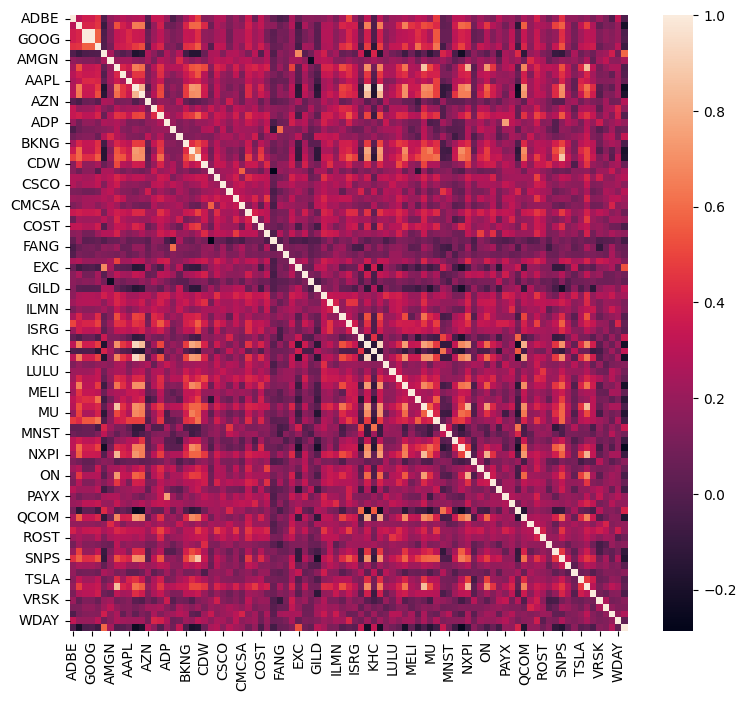

In [66]:
## Insert your code here

import matplotlib.pyplot as plt
plt.figure(figsize = (9,8))
sns.heatmap(Z.corr())

- Extract the stock that are the less correlated

In [ ]:
## Insert your code here

- Plot the NAV of the mean of the two assets

In [ ]:
## Insert your code here

The transformers library, developed by Hugging Face, provides pre-trained models for natural language processing (NLP) tasks, such as sentiment analysis, text classification, and more. In this tutorial, we will use a pre-trained sentiment analysis model to determine the sentiment of stock-related news articles.
First, install and import the transformers library:


In [67]:
!pip install transformers
from transformers import pipeline

Now, let's load a pre-trained model for sentiment analysis and analyze a news headline:

In [68]:
# Load pre-trained sentiment analysis pipeline
sentiment_pipeline = pipeline('sentiment-analysis')

# Analyze a news headline
headline = "Apple reports record-breaking earnings amid strong iPhone sales."
result = sentiment_pipeline(headline)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [69]:
print(result)

[{'label': 'POSITIVE', 'score': 0.9994739890098572}]


- Extract the sentiment using titles from some stocks using yfinance

In [70]:
## Insert your code here

msft = yf.Ticker("MSFT")

In [81]:
msft.news[6]['link']

'https://finance.yahoo.com/m/e903389f-07af-3ccb-ba98-846a3ceb6cdf/these-5-artificial.html'

In [74]:
print(sentiment_pipeline(msft.news[0]['title']))

[{'label': 'POSITIVE', 'score': 0.6960895657539368}]


In [ ]:
msft.news[0]

- Using this provided code, extract the sentiment from website directly

In [83]:
import requests
from bs4 import BeautifulSoup
# Function to scrape the website content
def scrape_website(url):
    # Send a GET request to the website
    response = requests.get(url)

    # If the request is successful (status code 200), parse the content
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'html.parser')

        # Extract the main content (this will depend on the website structure, but we often extract <p> tags)
        paragraphs = soup.find_all('p')
        content = ' '.join([p.get_text() for p in paragraphs])
        return content
    else:
        print(f"Failed to retrieve content. Status code: {response.status_code}")
        return None

In [ ]:
## Insert your code here

In [86]:
content_link = scrape_website(msft.news[0]['link'])

In [89]:
print(sentiment_pipeline(content_link[:512]))

[{'label': 'NEGATIVE', 'score': 0.7044880390167236}]


In [87]:
content_link

"Intel (INTC) revealed a pair of AI chips on Tuesday as it seeks to improve its data center business and steal market share from rivals AMD (AMD) and Nvidia (NVDA). The new chips, the Xeon 6 CPU and Gaudi 3 AI accelerator, promise improved performance and power efficiency and come at a time when Intel is trying to prove it has what it takes to be a major player in the AI space. The announcement follows a Wall Street Journal report that Qualcomm is looking into a potential takeover of Intel to bolster its own chip business. Bloomberg, meanwhile, reported that Apollo Global Management is interested in making a multibillion-dollar investment in the chipmaker that would back Intel CEO Pat Gelsinger’s massive turnaround plan. Apollo is the parent company of Yahoo Finance. Intel says the new Xeon 6 chip offers P-cores, or performance cores, and says it features twice the performance of its predecessor. The chip, according to the company, is built for AI and high-performance compute scenarios

**Exercice: Momentum Strategy on 50 Stocks**

## Objective
Explore the performance of a simple momentum strategy on a subset of 50 stocks.

## Procedure

### 1. Stock Selection (Hard Question)
- Use `pandas` to fetch the list of all tickers from https://en.wikipedia.org/wiki/List_of_S%26P_500_companies
- Randomly select 50 stocks from this list.

### 2. Data Collection
- For each stock, download the daily adjusted closing prices for the last 365 days.
- Store this data in a pandas DataFrame with dates as the index.

### 3. Momentum Calculation
- Define momentum as the percentage change in the stock price over the previous n days (e.g., n=20 for a month).
- Using pandas, compute the momentum for each stock for each day.
- Rank the stocks based on their momentum every day.

### 4. Strategy
- At the beginning of each day, buy the top 10 stocks based on momentum from the previous month.
- Repeat this process for each day in your dataset.

### 5. Performance Analysis
- Calculate the monthly and annualized return of this strategy.
- Compare the strategy's performance against a benchmark (e.g., S&P 500).
- Plot the cumulative returns of your strategy and the benchmark.

### 6. Risk Analysis
- Using numpy, compute the standard deviation of the monthly returns to get a measure of the strategy's risk.
- Calculate the Sharpe Ratio.

## Hints
- To compute momentum:
  ```python
n = 20
momentum = data['Adj Close'].pct_change(n)
    ```
- To rank stocks based on momentum:
  ```python
ranked_stocks = momentum.sort_values(ascending=False)
```
